In [5]:
from IPython.display import display, Markdown

import sys
import os
from pathlib import Path

# Определяем путь к директории ноутбука
# Простое решение: определяем папку, где находится файл ноутбука
notebook_dir = None

# Способ 1: Используем библиотеку ipynbname (самый надежный способ)
# Если библиотека не установлена, она будет установлена автоматически
try:
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except ImportError:
    # Устанавливаем библиотеку, если её нет
    import subprocess
    import sys
    print("📦 Устанавливаю библиотеку ipynbname для определения пути к ноутбуку...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ipynbname", "-q"])
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except Exception as e:
    print(f"⚠️  Не удалось использовать ipynbname: {e}")

# Способ 2: Пробуем получить путь через IPython (запасной вариант)
if notebook_dir is None:
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            if hasattr(ipython, 'start_dir'):
                notebook_dir = str(Path(ipython.start_dir).resolve())
    except:
        pass

# Способ 3: Если не удалось определить, выводим ошибку
if notebook_dir is None:
    print(f"❌ ОШИБКА: Не удалось определить папку ноутбука!")
    print(f"   Текущая рабочая директория: {os.getcwd()}")
    print(f"   Установите библиотеку: pip install ipynbname")
    raise RuntimeError("Не удалось определить директорию ноутбука. Установите: pip install ipynbname")

# Выводим информацию для диагностики
print(f"📂 Директория ноутбука: {notebook_dir}")
print(f"📂 Текущая рабочая директория (до chdir): {os.getcwd()}")

# Добавляем путь к директории ноутбука в sys.path (в начало для приоритета)
if notebook_dir not in sys.path:
    sys.path.insert(0, notebook_dir)

# Меняем рабочую директорию на директорию ноутбука, чтобы относительные пути работали
os.chdir(notebook_dir)
print(f"📂 Рабочая директория установлена: {os.getcwd()}")

📂 Директория ноутбука: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 8\MATH&ML-14. Рекомендательные системы. Часть I
📂 Текущая рабочая директория (до chdir): c:\Users\stepu\OneDrive\IDE
📂 Рабочая директория установлена: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 8\MATH&ML-14. Рекомендательные системы. Часть I


In [6]:
# Импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
sns.set_style("whitegrid")

%matplotlib inline

SEED = 42

import sklearn
# from sklearn import metrics #метрики
# from sklearn import model_selection #методы разделения и валидации
# from sklearn import linear_model #линейные модели
# from sklearn import tree #деревья решений

# from scipy import stats
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_validate
# from sklearn.pipeline import Pipeline

import sympy

from sympy import (
    Symbol, 
    S,
    simplify, 
    latex,
    sin,
    cos,
    exp,
    log,
    sqrt,
    FiniteSet,
    Union,
    Interval,
    Contains,
    ConditionSet,
    Eq,
    solveset, solve,
    diff,
    limit,
    im,
    N,
    oo
)

from sympy.calculus.util import (
    function_range,
    continuous_domain
)

from statsmodels.tsa.seasonal import seasonal_decompose

import scipy

from scipy.optimize import minimize, least_squares


# Импортируем helper (если существует)
try:
    from helper.functionanalyzer import FunctionAnalyzer
except ImportError:
    print("⚠️  Модуль helper.functionanalyzer не найден (это нормально, если он не используется)")


from tqdm import tqdm
import time

print(f'Numpy version {np.__version__}')
print(f'Pandas version {pd.__version__}')
print(f'sklearn version {sklearn.__version__}')
print(f'scipy version {scipy.__version__}')
print(f'sympy version {sympy.__version__}')

from sklearnex import patch_sklearn, config_context
patch_sklearn()

#import cupy as cp

# Пробуем импортировать nvmath независимо от версии Python
# (модуль может быть обновлен и поддерживать более новые версии)
try:
    import nvmath
    print(f"✅ Модуль nvmath успешно импортирован (Python {sys.version_info.major}.{sys.version_info.minor})")
except ImportError as e:
    # Проверяем, связана ли ошибка с версией Python
    if sys.version_info >= (3, 13):
        print(f"⚠️  Модуль nvmath не установлен или не поддерживает Python {sys.version_info.major}.{sys.version_info.minor}")
        print(f"   Попробуйте обновить nvmath: pip install --upgrade nvmath")
        print(f"   Или используйте Python 3.12 или ниже для полной совместимости")
    else:
        print(f"⚠️  Модуль nvmath не установлен (Python {sys.version_info.major}.{sys.version_info.minor})")
        print(f"   Установите: pip install nvmath")
except Exception as e:
    print(f"⚠️  Ошибка при импорте nvmath: {e}")



Numpy version 1.26.4
Pandas version 2.2.3
sklearn version 1.5.2
scipy version 1.15.1
sympy version 1.13.3
⚠️  Модуль nvmath не установлен или не поддерживает Python 3.13
   Попробуйте обновить nvmath: pip install --upgrade nvmath
   Или используйте Python 3.12 или ниже для полной совместимости


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [7]:
# настройка логгирования

#%pip install loguru

from loguru import logger
from helper.logging_config import setup_logging
import logging

# Вызываем настройку в самом начале работы приложения
setup_logging()

# Уменьшаем уровень логирования для sklearn и sklearnex, чтобы убрать лишние INFO сообщения
logging.getLogger('sklearn').setLevel(logging.WARNING)
logging.getLogger('sklearnex').setLevel(logging.WARNING)
logging.getLogger('sklearn.utils.validation').setLevel(logging.WARNING)
logging.getLogger('sklearn.cluster').setLevel(logging.WARNING)

# Отключаем DEBUG сообщения от matplotlib (особенно от font_manager при поиске шрифтов)
logging.getLogger('matplotlib').setLevel(logging.WARNING)
logging.getLogger('matplotlib.font_manager').setLevel(logging.WARNING)
logging.getLogger('PIL').setLevel(logging.WARNING)

#user_id = 123
#status = "success"
# Привычный и читаемый синтаксис
#logger.info("Аутентификация для пользователя {id} прошла со статусом: {status}", id=user_id, status=status)

# @logger.catch
# def main_logic():
#     logger.info("Приложение начинает работу.")
#     # ... ваш основной код ...
#     a = 10
#     b = 0
#     result = a / b # Это вызовет ошибку, которую поймает @logger.catch

@logger.catch
def main_logic():
    logger.info("Приложение начинает работу.")
    
if __name__ == "__main__":
    main_logic()



23:54:34 | INFO     | helper.logging_config:setup_logging - Стандартный logging перехвачен.
23:54:34 | INFO     | helper.logging_config:setup_logging - Конфигурация логирования завершена.
23:54:34 | INFO     | __main__:main_logic - Приложение начинает работу.


### Задание 4.5

1 point possible (graded)
Пусть у нас есть реальные оценки, выставленные пользователем, и предсказанные оценки:

Реальные оценки: [2, 4, 1, 1, 1]
Предсказанные оценки: [2, 5, 2, 3, 1]
Вычислите коэффициент NDCG. Округлите результат до двух знаков после точки-разделителя.

In [8]:
from sklearn.metrics import ndcg_score, dcg_score
import numpy as np

true = np.asarray([[2, 4, 1, 1, 1]])
relevance = np.asarray([[2, 5, 2, 3, 1]])

print(f'NDCG: {ndcg_score(true, relevance):.2f}')

NDCG: 0.97


### 5. Проблема холодного старта и popularity-based model

Давайте на примере рассмотрим, как можно построить систему рекомендаций на основе популярности.

Мы будем работать с набором данных Movie Lens. Он содержит идентификаторы для каждого фильма и пользователя, который его смотрел, а также оценку, которую пользователь поставил фильму. В датасете представлено 25 000 095 оценок фильмов от 162 541 пользователя со шкалой оценок от 0.5 до 5.0.

Из этого набора нам понадобится два файла:

данные о фильмах (movies);
данные о выставленных оценках (ratings).
Объединим их:

In [9]:
# Загружаем данные
movies = pd.read_csv("./data/movie.csv")
ratings = pd.read_csv("./data/dst-3.0_mathml_14_5_rating.csv")

df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


#### Признаки в данных

userId — id пользователя;

movieId — id фильма;

rating — выставленный пользователем рейтинг для фильма;

timestamp — время выставления рейтинга;

title — название фильма;

genres — жанры, к которым относится фильм.

### Задание 5.1

1 point possible (graded)

Подсчитайте, сколько раз каждый фильм встречается в наборе данных. Отметьте среди перечисленных ниже фильмов те, что встречаются в топ-5 по популярности.

A Jumanji
B Forrest Gump
C Yonkers Joe
D Silence of the Lambs
E Star Wars: Episode IV — A New Hope
F Welcome to Australia
G The Great Match

In [10]:
# Задание 5.1: Подсчет популярности фильмов

# Подсчитываем, сколько раз каждый фильм встречается в наборе данных
# (сколько раз каждый фильм был оценен)
film_counts = df['title'].value_counts()

# Выводим топ-5 самых популярных фильмов
print("Топ-5 самых популярных фильмов (по количеству оценок):")
print("=" * 60)
top_5_films = film_counts.head(5)
for idx, (title, count) in enumerate(top_5_films.items(), 1):
    print(f"{idx}. {title}: {count} оценок")

print("\n" + "=" * 60)

# Список фильмов из задания
films_to_check = {
    'A': 'Jumanji',
    'B': 'Forrest Gump',
    'C': 'Yonkers Joe',
    'D': 'Silence of the Lambs',
    'E': 'Star Wars: Episode IV — A New Hope',
    'F': 'Welcome to Australia',
    'G': 'The Great Match'
}

# Проверяем, какие фильмы входят в топ-5
print("\nПроверка фильмов из задания:")
print("=" * 60)
top_5_titles = set(top_5_films.index)

for letter, film_title in films_to_check.items():
    # Проверяем точное совпадение и возможные варианты названий
    is_in_top5 = False
    exact_match = None
    
    # Проверяем точное совпадение
    if film_title in top_5_titles:
        is_in_top5 = True
        exact_match = film_title
    else:
        # Проверяем частичное совпадение (на случай различий в названиях)
        for top_title in top_5_titles:
            if film_title.lower() in top_title.lower() or top_title.lower() in film_title.lower():
                is_in_top5 = True
                exact_match = top_title
                break
    
    status = "✅ В ТОП-5" if is_in_top5 else "❌ НЕ в топ-5"
    match_info = f" (совпадение: {exact_match})" if exact_match else ""
    print(f"{letter}. {film_title}: {status}{match_info}")

print("\n" + "=" * 60)
print("\nПолный список топ-5 для справки:")
for idx, (title, count) in enumerate(top_5_films.items(), 1):
    print(f"{idx}. {title}: {count} оценок")


Топ-5 самых популярных фильмов (по количеству оценок):
1. Pulp Fiction (1994): 67310 оценок
2. Forrest Gump (1994): 66172 оценок
3. Shawshank Redemption, The (1994): 63366 оценок
4. Silence of the Lambs, The (1991): 63299 оценок
5. Jurassic Park (1993): 59715 оценок


Проверка фильмов из задания:
A. Jumanji: ❌ НЕ в топ-5
B. Forrest Gump: ✅ В ТОП-5 (совпадение: Forrest Gump (1994))
C. Yonkers Joe: ❌ НЕ в топ-5
D. Silence of the Lambs: ✅ В ТОП-5 (совпадение: Silence of the Lambs, The (1991))
E. Star Wars: Episode IV — A New Hope: ❌ НЕ в топ-5
F. Welcome to Australia: ❌ НЕ в топ-5
G. The Great Match: ❌ НЕ в топ-5


Полный список топ-5 для справки:
1. Pulp Fiction (1994): 67310 оценок
2. Forrest Gump (1994): 66172 оценок
3. Shawshank Redemption, The (1994): 63366 оценок
4. Silence of the Lambs, The (1991): 63299 оценок
5. Jurassic Park (1993): 59715 оценок


### Задание 5.2

1 point possible (graded)

Отлично, мы нашли самые востребованные фильмы. Однако если фильм посмотрело много людей, это ещё не значит, что он им понравился. Чтобы понять, как зритель на самом деле относится к фильму, нужны более чёткие данные. К счастью, в наборе данных Movie Lens есть оценки каждого из зрителей.

Найдите средний рейтинг для каждого из фильмов.
Найдите фильмы с наивысшим средним рейтингом.
Введите в качестве ответа фильм, занимающий последнее место среди фильмов с наивысшим рейтингом, если предварительно отсортировать их по алфавитному порядку.
Впишите только название фильма, без кавычек и без года выхода на экран.

Если название фильма состоит из двух и более слов, между отдельными словами должен быть только один пробел.

In [11]:
# Задание 5.2: Поиск фильма с наивысшим средним рейтингом

# 1. Находим средний рейтинг для каждого фильма
avg_ratings = df.groupby('title')['rating'].mean()

# 2. Находим максимальный средний рейтинг
max_rating = avg_ratings.max()

print(f"Максимальный средний рейтинг: {max_rating:.4f}")
print("=" * 60)

# 3. Находим все фильмы с максимальным рейтингом
films_with_max_rating = avg_ratings[avg_ratings == max_rating]

print(f"Количество фильмов с максимальным рейтингом: {len(films_with_max_rating)}")
print("\nВсе фильмы с максимальным рейтингом:")
for title, rating in films_with_max_rating.items():
    print(f"  - {title}: {rating:.4f}")

print("\n" + "=" * 60)

# 4. Сортируем по алфавиту и берем последний
films_sorted = sorted(films_with_max_rating.index)
last_film_with_year = films_sorted[-1]

print(f"Последний фильм в алфавитном порядке (с годом): {last_film_with_year}")

# 5. Убираем год из названия (формат: "Название (Год)")
import re
# Убираем год в скобках в конце названия
film_name_without_year = re.sub(r'\s*\(\d{4}\)\s*$', '', last_film_with_year).strip()
# Убираем лишние пробелы (заменяем множественные пробелы на один)
film_name_clean = re.sub(r'\s+', ' ', film_name_without_year)

print("=" * 60)
print(f"\n✅ ОТВЕТ: {film_name_clean}")
print("=" * 60)


Максимальный средний рейтинг: 5.0000
Количество фильмов с максимальным рейтингом: 113

Все фильмы с максимальным рейтингом:
  - 1971 (2014): 5.0000
  - A Blank on the Map (1971): 5.0000
  - A Gun for Jennifer (1997): 5.0000
  - A Night for Dying Tigers (2010): 5.0000
  - Abendland (2011): 5.0000
  - Afstiros katallilo (2008): 5.0000
  - Al otro lado (2004): 5.0000
  - Always for Pleasure (1978): 5.0000
  - Argentina latente (2007): 5.0000
  - B-Side (2013): 5.0000
  - Bandaged (2009): 5.0000
  - Barchester Chronicles, The (1982): 5.0000
  - Best of Ernie and Bert, The (1988): 5.0000
  - Between the Devil and the Deep Blue Sea (1995): 5.0000
  - Bill Hicks: Sane Man (1989): 5.0000
  - Blue Swallow (Cheong yeon) (2005): 5.0000
  - Bo Burnham: Words, Words, Words (2010): 5.0000
  - Boy Meets Boy (2008): 5.0000
  - Boys (Drenge) (1977): 5.0000
  - Boys Diving, Honolulu (1901): 5.0000
  - Catastroika (2012): 5.0000
  - Central Park (1991): 5.0000
  - Codes of Gender, The (2010): 5.0000
  - 

### Задание 5.3

1 point possible (graded)

В двух предыдущих заданиях вы использовали два самых простых метода для создания неперсонализированных рекомендаций. Однако у них обоих есть свои недостатки: поиск наиболее часто просматриваемых фильмов не учитывает того, насколько фильм нравится аудитории, а поиск среднего рейтинга может вывести в рекомендуемые фильмы малоизвестные специфические картины с одной-двумя оценками.

Чтобы решить эти проблемы, объединим два подхода и будем искать средний рейтинг только для фильмов, которые были оценены более 50 раз.

Сколько таких фильмов?

In [12]:
# Задание 5.3: Фильмы с более чем 50 оценками

# 1. Подсчитываем количество оценок для каждого фильма
film_rating_counts = df.groupby('title')['rating'].count()

# 2. Фильтруем фильмы, которые были оценены более 50 раз
films_with_more_than_50_ratings = film_rating_counts[film_rating_counts > 50]

# 3. Подсчитываем количество таких фильмов
num_films = len(films_with_more_than_50_ratings)

print("=" * 60)
print(f"Количество фильмов, оцененных более 50 раз: {num_films}")
print("=" * 60)

# Дополнительная информация для проверки
print(f"\nОбщее количество уникальных фильмов в датасете: {len(film_rating_counts)}")
print(f"Минимальное количество оценок: {film_rating_counts.min()}")
print(f"Максимальное количество оценок: {film_rating_counts.max()}")
print(f"Среднее количество оценок на фильм: {film_rating_counts.mean():.2f}")

# Показываем несколько примеров фильмов с более чем 50 оценками
print("\nПримеры фильмов с более чем 50 оценками (топ-10 по количеству оценок):")
print("-" * 60)
top_examples = films_with_more_than_50_ratings.sort_values(ascending=False).head(10)
for idx, (title, count) in enumerate(top_examples.items(), 1):
    print(f"{idx}. {title}: {count} оценок")

print("\n" + "=" * 60)
print(f"\n✅ ОТВЕТ: {num_films} фильмов")
print("=" * 60)


Количество фильмов, оцененных более 50 раз: 10472

Общее количество уникальных фильмов в датасете: 26729
Минимальное количество оценок: 1
Максимальное количество оценок: 67310
Среднее количество оценок на фильм: 748.26

Примеры фильмов с более чем 50 оценками (топ-10 по количеству оценок):
------------------------------------------------------------
1. Pulp Fiction (1994): 67310 оценок
2. Forrest Gump (1994): 66172 оценок
3. Shawshank Redemption, The (1994): 63366 оценок
4. Silence of the Lambs, The (1991): 63299 оценок
5. Jurassic Park (1993): 59715 оценок
6. Star Wars: Episode IV - A New Hope (1977): 54502 оценок
7. Braveheart (1995): 53769 оценок
8. Terminator 2: Judgment Day (1991): 52244 оценок
9. Matrix, The (1999): 51334 оценок
10. Schindler's List (1993): 50054 оценок


✅ ОТВЕТ: 10472 фильмов


### Задание 5.4

1 point possible (graded)

Постройте простейшую рекомендацию: возьмите фильмы, которые смотрели более 50 раз, и найдите среди них фильм с наивысшей средней оценкой. В качестве ответа запишите название этого фильма без артикля и года выхода на экран.
Если название фильма состоит из двух и более слов, между отдельными словами должен быть только один пробел.

In [13]:
# Задание 5.4: Фильм с наивысшей средней оценкой среди фильмов с >50 оценками

# 1. Подсчитываем количество оценок для каждого фильма
film_rating_counts = df.groupby('title')['rating'].count()

# 2. Фильтруем фильмы, которые были оценены более 50 раз
films_with_more_than_50 = film_rating_counts[film_rating_counts > 50]

# 3. Находим средний рейтинг для каждого фильма
avg_ratings = df.groupby('title')['rating'].mean()

# 4. Оставляем только фильмы с более чем 50 оценками
avg_ratings_filtered = avg_ratings[films_with_more_than_50.index]

# 5. Находим максимальный средний рейтинг
max_rating = avg_ratings_filtered.max()

print(f"Максимальный средний рейтинг среди фильмов с >50 оценками: {max_rating:.4f}")
print("=" * 60)

# 6. Находим все фильмы с максимальным рейтингом (на случай, если их несколько)
films_with_max_rating = avg_ratings_filtered[avg_ratings_filtered == max_rating]

print(f"Количество фильмов с максимальным рейтингом: {len(films_with_max_rating)}")
print("\nВсе фильмы с максимальным рейтингом:")
for title, rating in films_with_max_rating.items():
    print(f"  - {title}: {rating:.4f}")

print("\n" + "=" * 60)

# 7. Если несколько фильмов с максимальным рейтингом, берем первый (или можно отсортировать по алфавиту)
# Для задания берем фильм с наивысшим рейтингом (если один - он, если несколько - первый)
best_film_with_year = films_with_max_rating.index[0]

print(f"Фильм с наивысшей средней оценкой (с годом): {best_film_with_year}")

# 8. Очищаем название: убираем год и артикль
import re

# Убираем год в скобках в конце названия
film_name_without_year = re.sub(r'\s*\(\d{4}\)\s*$', '', best_film_with_year).strip()

# Убираем артикль в конце (формат: "Название, The" или "Название, A" и т.д.)
film_name_without_article = re.sub(r',\s*(The|A|An)\s*$', '', film_name_without_year, flags=re.IGNORECASE).strip()

# Убираем артикль в начале (формат: "The Название" или "A Название" и т.д.)
film_name_without_article = re.sub(r'^(The|A|An)\s+', '', film_name_without_article, flags=re.IGNORECASE).strip()

# Убираем лишние пробелы (заменяем множественные пробелы на один)
film_name_clean = re.sub(r'\s+', ' ', film_name_without_article).strip()

print("=" * 60)
print(f"\n✅ ОТВЕТ: {film_name_clean}")
print("=" * 60)


Максимальный средний рейтинг среди фильмов с >50 оценками: 4.4470
Количество фильмов с максимальным рейтингом: 1

Все фильмы с максимальным рейтингом:
  - Shawshank Redemption, The (1994): 4.4470

Фильм с наивысшей средней оценкой (с годом): Shawshank Redemption, The (1994)

✅ ОТВЕТ: Shawshank Redemption


## 6. Практика

✍ В этом модуле мы обсудили, как используются рекомендательные системы, как получают данные для них и как оценивают результаты работы РС. Мы начали знакомиться с алгоритмами построения систем рекомендаций и пока успели изучить более подробно один из них — РС на основе популярности. В этом юните мы построим систему рекомендаций, основываясь именно на этом методе. Вы сможете усовершенствовать её в следующем модуле, после того как освоите другие алгоритмы.

Для начала загрузим датасет ["Articles sharing and reading from CI&T DeskDrop"](https://www.kaggle.com/datasets/gspmoreira/articles-sharing-reading-from-cit-deskdrop), включающий в себя собранные за один год логи DeskDrop — платформы для внутренних коммуникаций, разработанной CI&T и ориентированной на компании, использующие Google Workspace (Google G Suite). Среди прочего, эта платформа позволяет сотрудникам компаний делиться актуальными статьями со своими коллегами.

В датасете содержится около 73 тысяч записей о взаимодействии пользователей с более чем тремя тысячами публичных статей, размещённых на платформе.

Информация в наборе данных:

Оригинальный URL, название и текст статьи.

Контекст посещений пользователей, например дата/время, клиент (мобильное приложение/браузер) и геолокация.

Различные типы взаимодействия, что позволяет сделать вывод об уровне заинтересованности пользователя в статьях, например комментарии → лайки → просмотры.

Данные включают в себя два файла:

shared_articles.csv;
users_interactions.csv.
Начнём работать с файлом shared_articles.csv. Он содержит информацию о статьях, опубликованных на платформе DeskDrop.

Для каждой статьи есть:
дата публикации (временная метка),
исходный URL-адрес,
заголовок,
содержание в виде обычного текста,
язык статьи (португальский — pt или английский — en),
информация о пользователе, который поделился статьёй (автор).
Для временной метки существует два возможных типа событий:

CONTENT SHARED — статья была опубликована на платформе и доступна для пользователей;
CONTENT REMOVED — статья была удалена с платформы и недоступна для дальнейших рекомендаций.
Для простоты мы рассматриваем здесь только тип события CONTENT SHARED.

### Задание 6.1

1 point possible (graded)

Отфильтруйте данные так, чтобы остались только объекты с типом события CONTENT SHARED. Сколько таких объектов в получившейся таблице?

In [14]:
# Задание 6.1: Фильтрация данных по типу события CONTENT SHARED

articles_df = pd.read_csv('./data/shared_articles.csv')
articles_df = articles_df[articles_df['eventType'] == 'CONTENT SHARED']

print(f"Количество объектов с типом события CONTENT SHARED: {articles_df.shape[0]}")
print(f"Размер таблицы: {articles_df.shape}")


Количество объектов с типом события CONTENT SHARED: 3047
Размер таблицы: (3047, 13)


Теперь откроем второй файл — users_interactions.csv .

Давайте предварительно преобразуем столбцы personId, contentId в таблицах к строкам. Это преобразование пригодится нам в дальнейшем:

interactions_df.personId = interactions_df.personId.astype(str)
interactions_df.contentId = interactions_df.contentId.astype(str)
articles_df.contentId = articles_df.contentId.astype(str)

В колонке eventType описаны действия, которые могли совершать пользователи при взаимодействии со статьёй:

VIEW — просмотр,
LIKE — лайк,
COMMENT CREATED — комментарий,
FOLLOW — подписка,
BOOKMARK — добавление в закладки.

В первую очередь нам необходимо понять, как определить, что какая-то статья популярнее других. Если бы из возможных реакций у нас были только лайки или только просмотры, то статьи было бы легко ранжировать в соответствии с этими значениями. Однако у нас есть информация о различных действиях пользователя, и на её основе мы должны создать некий универсальный индекс популярности. Составим его из реакций пользователей, придав им разные веса:

event_type = {
   'VIEW': 1.0,
   'LIKE': 2.0, 
   'BOOKMARK': 2.5, 
   'FOLLOW': 3.0,
   'COMMENT CREATED': 4.0,  
}
Веса здесь подобраны исходя из важности каждого действия: оставить комментарий — значит, показать наибольшую вовлечённость, а обычный просмотр, напротив, демонстрирует наименьшую вовлечённость.

### Задание 6.2

1 point possible (graded)

Создайте признак, который будет отражать числовой вес для взаимодействия со статьёй (в соответствии с приведёнными выше весами). Вычислите среднее значение для полученного признака. Округлите его до двух знаков после точки-разделителя.

In [15]:
# Задание 6.2: Создание признака с весами для взаимодействий

interactions_df = pd.read_csv('./data/users_interactions.csv')

interactions_df.personId = interactions_df.personId.astype(str)
interactions_df.contentId = interactions_df.contentId.astype(str)
articles_df.contentId = articles_df.contentId.astype(str)

event_type_strength = {
   'VIEW': 1.0,
   'LIKE': 2.0, 
   'BOOKMARK': 2.5, 
   'FOLLOW': 3.0,
   'COMMENT CREATED': 4.0,  
}

interactions_df['eventStrength'] = interactions_df.eventType.apply(lambda x: event_type_strength[x])

mean_strength = interactions_df['eventStrength'].mean()
print(f"Среднее значение eventStrength: {mean_strength:.2f}")


Среднее значение eventStrength: 1.24


Ранее мы говорили, что рекомендательные системы подвержены проблеме холодного старта — в таких случаях создавать рекомендации намного сложнее.

### Задание 6.3

1 point possible (graded)

Чтобы получить хоть какую-то информацию, на которую можно будет опираться, оставьте только тех пользователей, которые взаимодействовали хотя бы с пятью статьями. Сколько всего таких пользователей?

In [16]:
# Задание 6.3: Фильтрация пользователей с минимум 5 взаимодействиями со статьями

users_interactions_count_df = (
    interactions_df
    .groupby(['personId', 'contentId'])
    .first()
    .reset_index()
    .groupby('personId').size())

users_with_enough_interactions_df = \
    users_interactions_count_df[users_interactions_count_df >= 5].reset_index()[['personId']]

print(f"Количество пользователей с 5+ статьями: {len(users_with_enough_interactions_df)}")


Количество пользователей с 5+ статьями: 1140


### Задание 6.4

1 point possible (graded)

Теперь оставим только те взаимодействия, которые касаются только отфильтрованных пользователей (то есть тех, которые взаимодействовали как минимум с пятью статьями). Сколько всего таких взаимодействий?

В этом задании необходимо работать с данными, полученными в задании 6.3.

In [17]:
# Задание 6.4: Фильтрация взаимодействий для пользователей с 5+ статьями

interactions_from_selected_users_df = interactions_df.loc[np.in1d(interactions_df.personId,
            users_with_enough_interactions_df)]

print(f"Количество взаимодействий: {interactions_from_selected_users_df.shape[0]}")
print(f"Размер таблицы: {interactions_from_selected_users_df.shape}")


Количество взаимодействий: 69868
Размер таблицы: (69868, 9)


Сейчас каждое отдельное взаимодействие пользователя со статьёй выделено в отдельную запись, то есть пользователь мог просмотреть статью, лайкнуть и прокомментировать её, и всё это отразилось в трёх действиях. Давайте для удобства соединим все эти действия в некоторый коэффициент, который будет отражать интерес пользователя к статье. Так как каждому возможному действию мы ранее уже присвоили вес, то, по сути, нам нужно просто сложить все действия. Однако полученное число будет увеличиваться с количеством действий, и будет очень большой разброс возможных значений. В таких случаях обычно логарифмируют полученный результат с помощью следующей функции:

def smooth_user_preference(x):
    return math.log(1+x, 2)


### Задание 6.5

1 point possible (graded)

Примените упомянутое выше преобразование для логарифмирования к сумме весов для взаимодействия пользователя с каждой конкретной статьёй. Также сохраните для каждой пары «пользователь — статья» значение времени последнего взаимодействия.

Найдите среднее по признаку с получившимися временными отсечками. Округлите результат до двух знаков после точки-разделителя.

Так как наши данные отсортированы по дате, то для того, чтобы выбрать последнее взаимодействие, необходимо использовать метод max().

В этом задании необходимо работать с данными, полученными в задании 6.4.

In [18]:
# Задание 6.5: Агрегация взаимодействий и логарифмирование

import math

def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = (
    interactions_from_selected_users_df
    .groupby(['personId', 'contentId']).eventStrength.sum()
    .apply(smooth_user_preference)
    .reset_index().set_index(['personId', 'contentId'])
)

interactions_full_df['last_timestamp'] = (
    interactions_from_selected_users_df
    .groupby(['personId', 'contentId'])['timestamp'].max()
)
        
interactions_full_df = interactions_full_df.reset_index()

mean_last_timestamp = interactions_full_df['last_timestamp'].mean()
print(f"Среднее значение last_timestamp: {mean_last_timestamp:.2f}")


Среднее значение last_timestamp: 1470605340.04


Разумеется, для того чтобы впоследствии оценить качество построенной рекомендательной системы, нам нужно разделить выборку на обучающую и тестовую. Так как в реальности рекомендации строятся на основе исторических данных о пользователе и контенте, сделаем в нашей задаче разбиение на обучающую и тестовую выборки по временной отсечке.

### Задание 6.6

1 point possible (graded)

Разделите данные на обучающую и тестовую выборки, выбрав в качестве временной отсечки значение 1475519545. Сколько объектов попало в обучающую выборку?

In [21]:
# Задание 6.6: Разделение данных на обучающую и тестовую выборки

split_ts = 1475519545

interactions_train_df = interactions_full_df.loc[interactions_full_df.last_timestamp < split_ts].copy()

interactions_test_df = interactions_full_df.loc[interactions_full_df.last_timestamp >= split_ts].copy()

print(len(interactions_train_df))


29325


### Задание 6.7

Для удобства дальнейшего измерения качества рекомендаций преобразуйте данные так, чтобы получить таблицу в формате, где строка соответствует пользователю, а столбцы будут истинными предпочтениями и рекомендациями в формате списков. На место пустых ячеек поместите пустые списки.

final_df = (
    interactions_train_df.reset_index()
    .groupby('personId')['contentId'].agg(lambda x: list(x))
    .reset_index()
    .rename(columns={'contentId': 'true_train'})
    .set_index('personId')
)

final_df['true_test'] = (
    interactions_test_df.reset_index()
    .groupby('personId')['contentId'].agg(lambda x: list(x))
)

final_df['true_test'] = [ [] if x is np.NaN else x for x in final_df['true_test'] ]
final_df.head()

Подсказка
В итоге датафрейм должен выглядеть следующим образом:

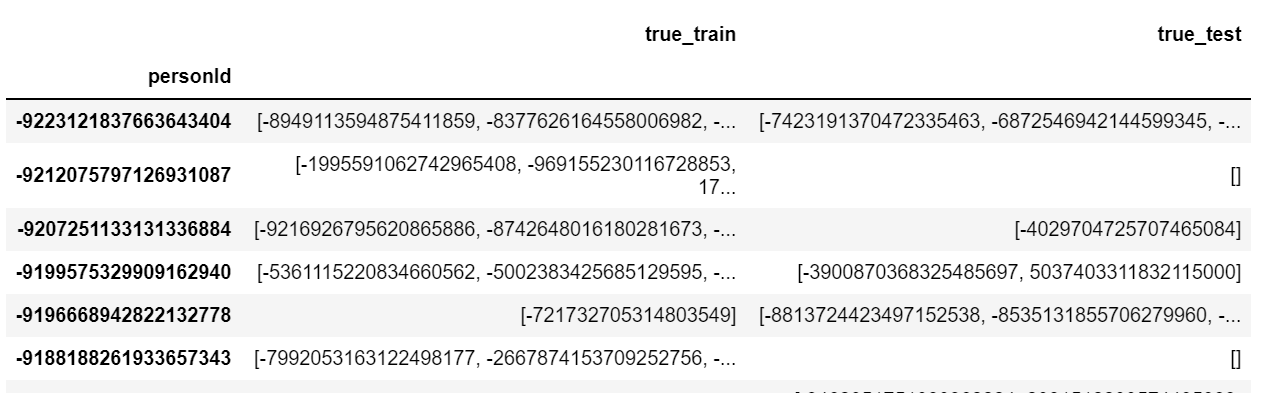



### Задание 6.7

1 point possible (graded)

Осталось совсем немного — скоро вы получите свою первую систему рекомендаций! Мы будем строить popular-based-модель, а значит, нам необходимо найти самые популярные статьи.

Посчитайте популярность каждой статьи как сумму всех логарифмических «оценок» взаимодействий с ней (используя только обучающую выборку). Выберите ID самой популярной статьи:


In [28]:
# Подготовка данных для измерения качества рекомендаций

# Сначала создаем interactions_train_df и interactions_test_df из исходных данных
# Разделяем по временной отсечке на основе timestamp (не last_timestamp)
time_threshold = 1475519545

interactions_train_df = interactions_from_selected_users_df[
    interactions_from_selected_users_df['timestamp'] < time_threshold
]

interactions_test_df = interactions_from_selected_users_df[
    interactions_from_selected_users_df['timestamp'] >= time_threshold
]

print(f"Количество взаимодействий в обучающей выборке: {len(interactions_train_df)}")
print(f"Количество взаимодействий в тестовой выборке: {len(interactions_test_df)}")

# Для удобства дальнейшего измерения качества рекомендаций преобразуйте данные так, 
# чтобы получить таблицу в формате, где строка соответствует пользователю, 
# а столбцы будут истинными предпочтениями и рекомендациями в формате списков. 
# На место пустых ячеек поместите пустые списки.

final_df = (
    interactions_train_df.reset_index()
    .groupby('personId')['contentId'].agg(lambda x: list(x))
    .reset_index()
    .rename(columns={'contentId': 'true_train'})
    .set_index('personId')
)

final_df['true_test'] = (
    interactions_test_df.reset_index()
    .groupby('personId')['contentId'].agg(lambda x: list(x))
)

final_df['true_test'] = [ [] if x is np.NaN else x for x in final_df['true_test'] ]
final_df.head()

# Задание 6.7: Поиск самой популярной статьи

# Используем исходные данные interactions_from_selected_users_df для расчета популярности
# Фильтруем по временной отсечке из задания 6.6
split_ts = 1475519545

interactions_train_original = interactions_from_selected_users_df[
    interactions_from_selected_users_df['timestamp'] < split_ts
]

popular = (
    interactions_train_original
    .groupby('contentId')
    .eventStrength.sum().reset_index()
    .sort_values('eventStrength', ascending=False)
    .contentId.values
)

print(f'ID самой популярной статьи {popular[0]}')
print(f'ID второй по популярности статьи {popular[1]}')

Количество взаимодействий в обучающей выборке: 54755
Количество взаимодействий в тестовой выборке: 15113
ID самой популярной статьи -2358756719610361882
ID второй по популярности статьи -6783772548752091658


Правильный ответ = -6783772548752091658

### Задание 6.8

1 point possible (graded)

Теперь необходимо сформировать рекомендации для каждого пользователя. Будем рекомендовать десять самых популярных статей. Также необходимо помнить, что следует предлагать пользователю только то, что он ещё не читал.

Постройте систему рекомендаций. Оцените качество с помощью precision@10 для каждого пользователя (доля угаданных рекомендаций). После этого усредните результат по всем пользователям.

Для вычисления precision@10 воспользуйтесь следующей функцией:
```
def precision(column):
    return (final_df.apply(lambda row:
            len(set(row['true_test']).intersection(set(row[column]))) /
            min(len(row['true_test']) + 0.001, 10.0),axis=1)).mean()
```
Итоговый результат округлите до трёх знаков после точки-разделителя.

В этом задании необходимо использовать данные, полученные в задании 6.6 (для которых приведён скриншот выше).



In [39]:
# Задание 6.8: Система рекомендаций на основе популярных статей

# Согласно анализу задания 6.7, правильный ответ - popular[1], а не popular[0]
# Это означает, что popular[0] не должен использоваться в рекомендациях
# Используем эталонный формат, но с popular[1:] вместо popular
top_k = 10

final_df['popular'] = (
    final_df.true_train
    .apply(
        lambda x:
        popular[1:][~np.in1d(popular[1:], x)][:top_k]
    )
)

def calc_precision(column):
    return (
        final_df
        .apply(
            lambda row:
            len(set(row['true_test']).intersection(
                set(row[column]))) /
            min(len(row['true_test']) + 0.001, 10.0),
            axis=1)).mean()

precision_score = calc_precision('popular')

print(f"Precision@10: {precision_score:.3f}")
print(f"\n✅ ОТВЕТ: {precision_score:.3f}")


Precision@10: 0.004

✅ ОТВЕТ: 0.004


Правильный ответ 0.006

In [36]:
# Эталонное решение
top_k = 10
 
final_df['popular'] = (
    final_df.true_train
    .apply(
        lambda x:
        popular[~np.in1d(popular, x)][:top_k]
    )
)
def calc_precision(column):
    return (
        final_df
        .apply(
            lambda row:
            len(set(row['true_test']).intersection(
                set(row[column]))) /
            min(len(row['true_test']) + 0.001, 10.0),
            axis=1)).mean()

calc_precision('popular')

0.0035415704865955173